In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import missingno as msno
import scipy as sp
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [10,5]

In [3]:
def count_overview(variable, title):
    plt.figure(figsize=(10,4))
    ax = sns.barplot(x=variable, y = variable.index, palette="Spectral")
    ax.set_title(title)
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

def stacked_barplot(tab, title):
    tab_percent = tab.apply(lambda r: r/r.sum(), axis=1)
    ax = tab_percent.plot.barh(stacked=True, cmap='Spectral', alpha=0.8)
    ax.set_title(title)
    vals = ax.get_yticks()
    ax.xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=5)
    plt.tight_layout()
    plt.show()

In [59]:
train = pd.read_csv("../data/train/train.csv")
test = pd.read_csv("../data/test/test.csv")


## Data Columns
[Source](https://www.kaggle.com/c/petfinder-adoption-prediction/data)

* **PetID** - Unique hash ID of pet profile
* **AdoptionSpeed** - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* **Type** - Type of animal (1 = Dog, 2 = Cat)
* **Name** - Name of pet (Empty if not named)
* **Age** - Age of pet when listed, in months
* **Breed1** - Primary breed of pet (Refer to BreedLabels dictionary)
* **Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* **Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* **Color1** - Color 1 of pet (Refer to ColorLabels dictionary)
* **Color2** - Color 2 of pet (Refer to ColorLabels dictionary)
* **Color3** - Color 3 of pet (Refer to ColorLabels dictionary)
* **MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* **FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* **Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* **Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* **Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* **Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* **Quantity** - Number of pets represented in profile
* **Fee** - Adoption fee (0 = Free)
* **State** - State location in Malaysia (Refer to StateLabels dictionary)
* **RescuerID** - Unique hash ID of rescuer
* **VideoAmt** - Total uploaded videos for this pet
* **PhotoAmt** - Total uploaded photos for this pet
* **Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.



***AdoptionSpeed***
* Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


# Dataset Overview

In [5]:
def view_df_summary(df):
    print(f'Dataframe is composed of {df.shape[1]} features and {df.shape[0]} records  \n  \n')
    display(df.head(3))
    print('\n')
    display(df.dtypes)
    print('\n')
    display(df.describe())
    print('\n')
    msno.bar(df, color=sns.color_palette("Spectral", 5)[4])

Dataframe is composed of 24 features and 14993 records  
  



,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


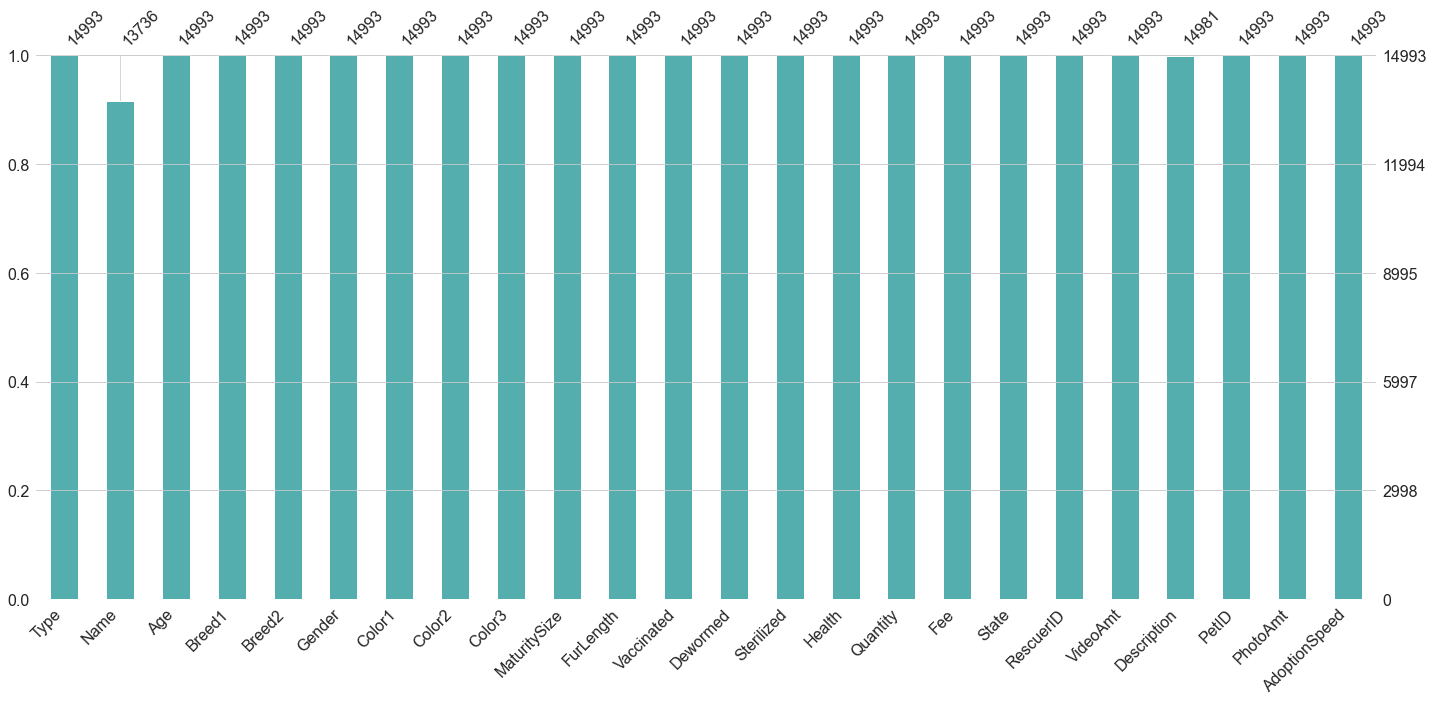

In [6]:
view_df_summary(train)

Dataframe is composed of 23 features and 3972 records  
  



,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0
1,2,Chi Chi,36,285,264,2,1,4,7,2,...,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0
2,2,Sticky,2,265,0,1,6,7,0,2,...,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0


Type              int64
Name             object
Age               int64
Breed1            int64
Breed2            int64
Gender            int64
Color1            int64
Color2            int64
Color3            int64
MaturitySize      int64
FurLength         int64
Vaccinated        int64
Dewormed          int64
Sterilized        int64
Health            int64
Quantity          int64
Fee               int64
State             int64
RescuerID        object
VideoAmt          int64
Description      object
PetID            object
PhotoAmt        float64
dtype: object

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1.471299,11.290534,263.628651,66.110775,1.769889,2.261581,3.277946,1.903575,1.848691,1.450655,1.697130,1.518127,1.895015,1.040534,1.597180,21.769637,41347.259063,0.042548,3.641742
std,0.499238,17.497150,60.241316,118.167713,0.688737,1.785615,2.745439,2.974756,0.553386,0.601209,0.675627,0.685074,0.598248,0.208407,1.500566,79.283772,32.965854,0.302682,3.373247
min,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,1.000000
50%,1.000000,4.000000,266.000000,0.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41327.000000,0.000000,3.000000
75%,2.000000,12.000000,307.000000,45.250000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000
max,2.000000,156.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,1500.000000,41415.000000,8.000000,30.000000


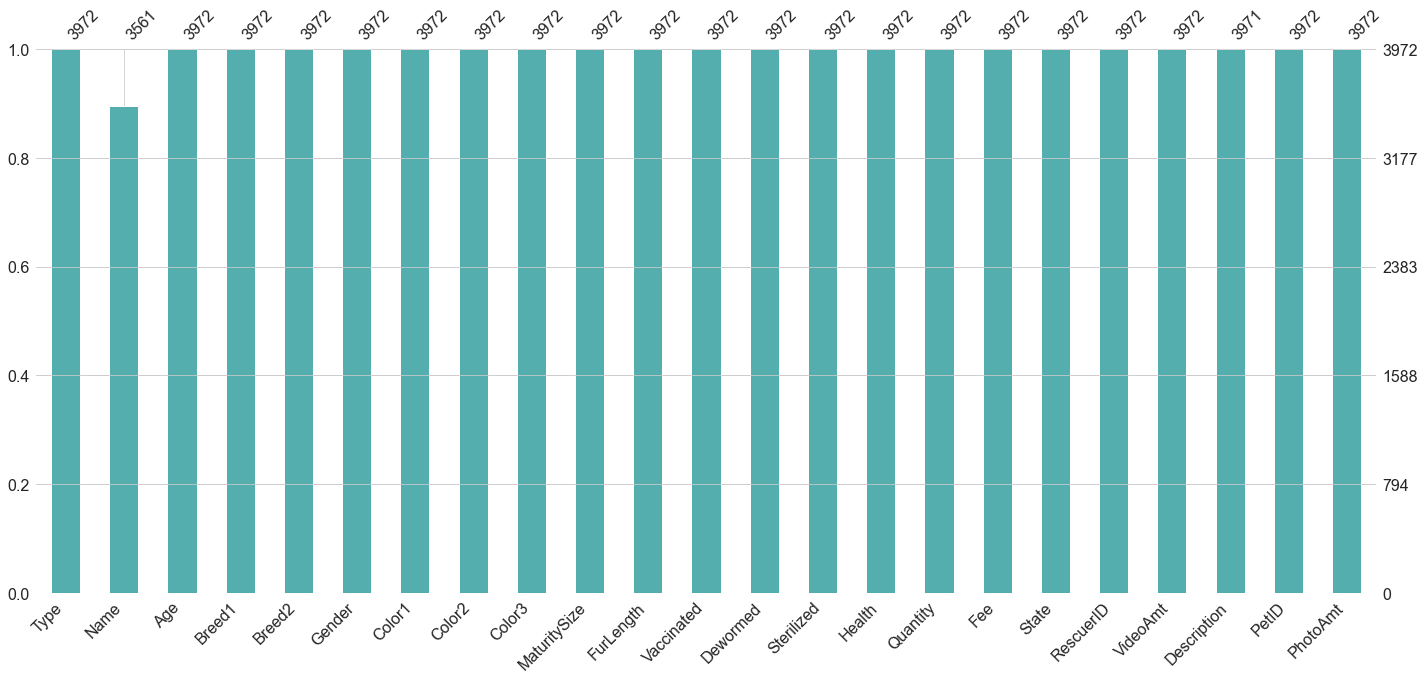

In [7]:
view_df_summary(test)

## Findings:
* Only feature with missing values is the Name
* Train: 13736/14993 (8.38% missing)
* Test: 3561/3972 (10.34% missing)
* Since the Name feature is a nominal value, we cannot impute the missing values 
    * **Idea**: Create a new feature "NameorNot" (Feature Engineering)

## Correlation Between Variables

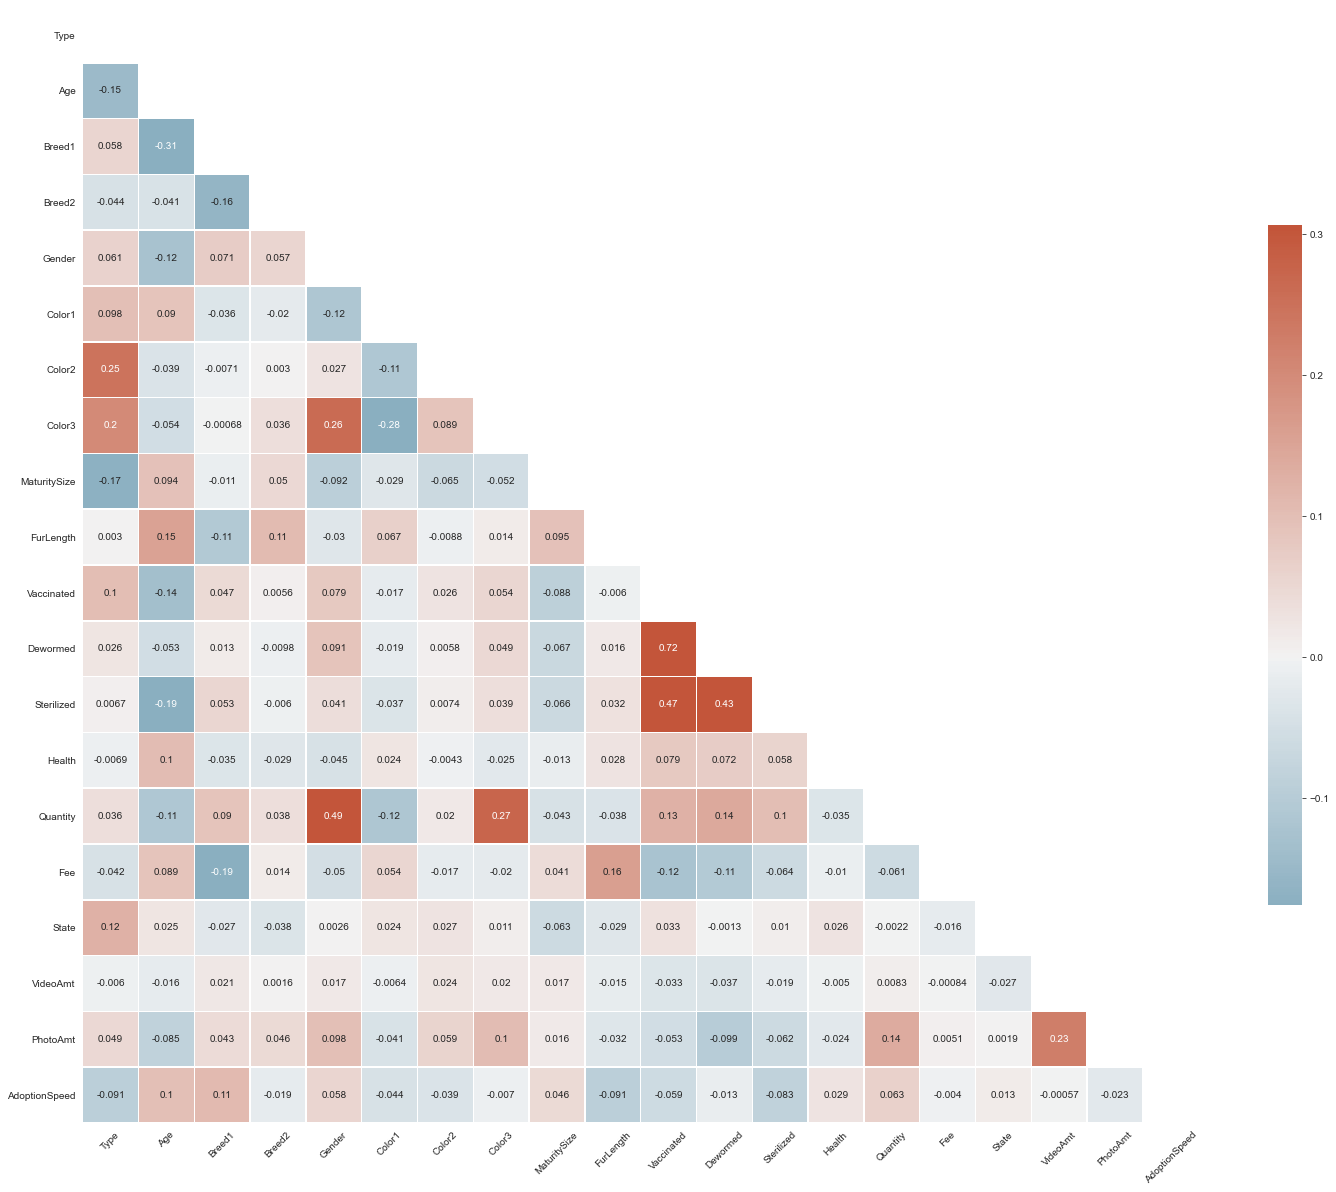

In [48]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5},
            annot=True, robust=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

In [87]:
corr

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


In [111]:
n=20
print(((n*n)/2)-n) # Pairwise Correlation
print((pow(n,3)/2)-n) # Triple Pair Correlation 

180.0
3980.0


In [80]:
def group_corrs(speed):
    data_df = train.copy(deep=True)
    data_df = data_df[data_df['AdoptionSpeed'] == speed]
    data_df.drop(['AdoptionSpeed'], axis=1, inplace=True)
    corr = data_df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f,ax = plt.subplots(figsize=(20,20))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    print(f'Correlations for Animals with AdoptionSpeed of {speed}')
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5},
                annot=True, robust=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.show()

Correlations for Animals with AdoptionSpeed of 0


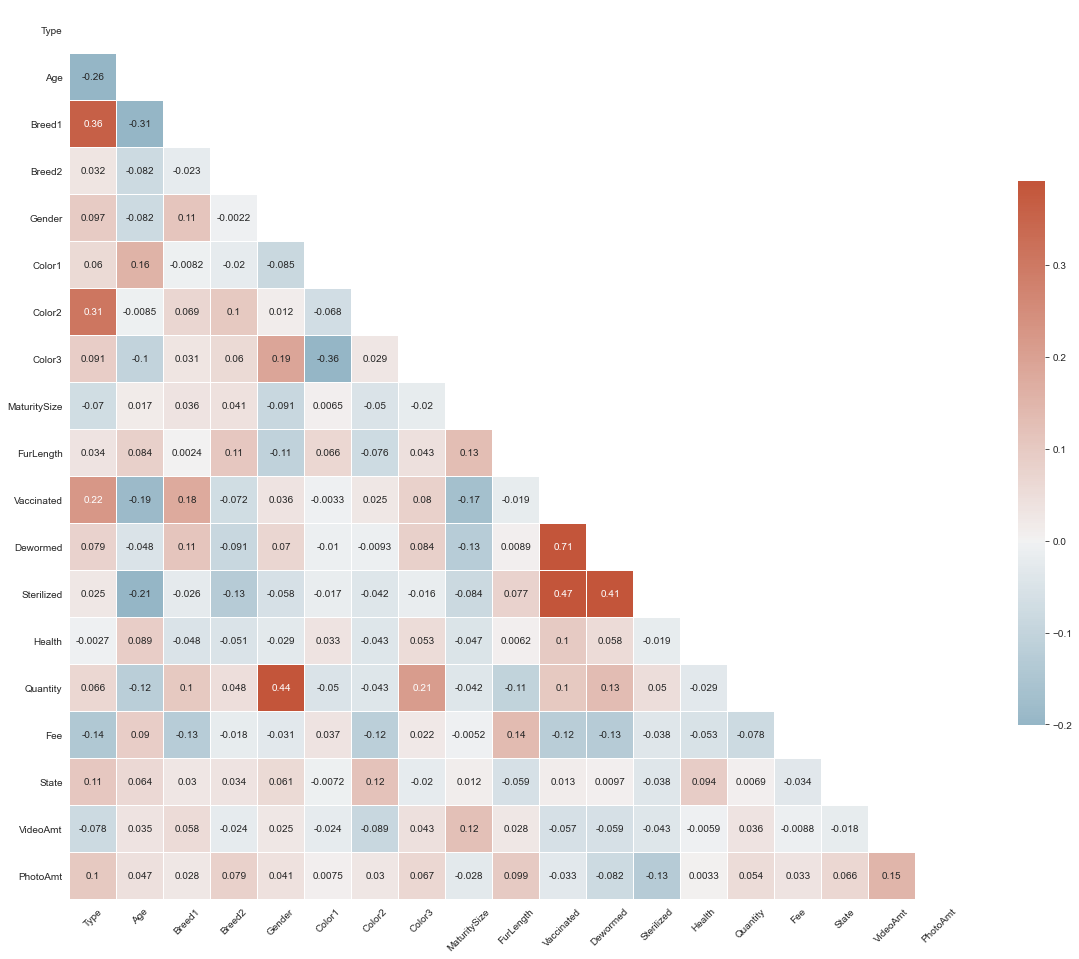

In [81]:
group_corrs(0)

Correlations for Animals with AdoptionSpeed of 1


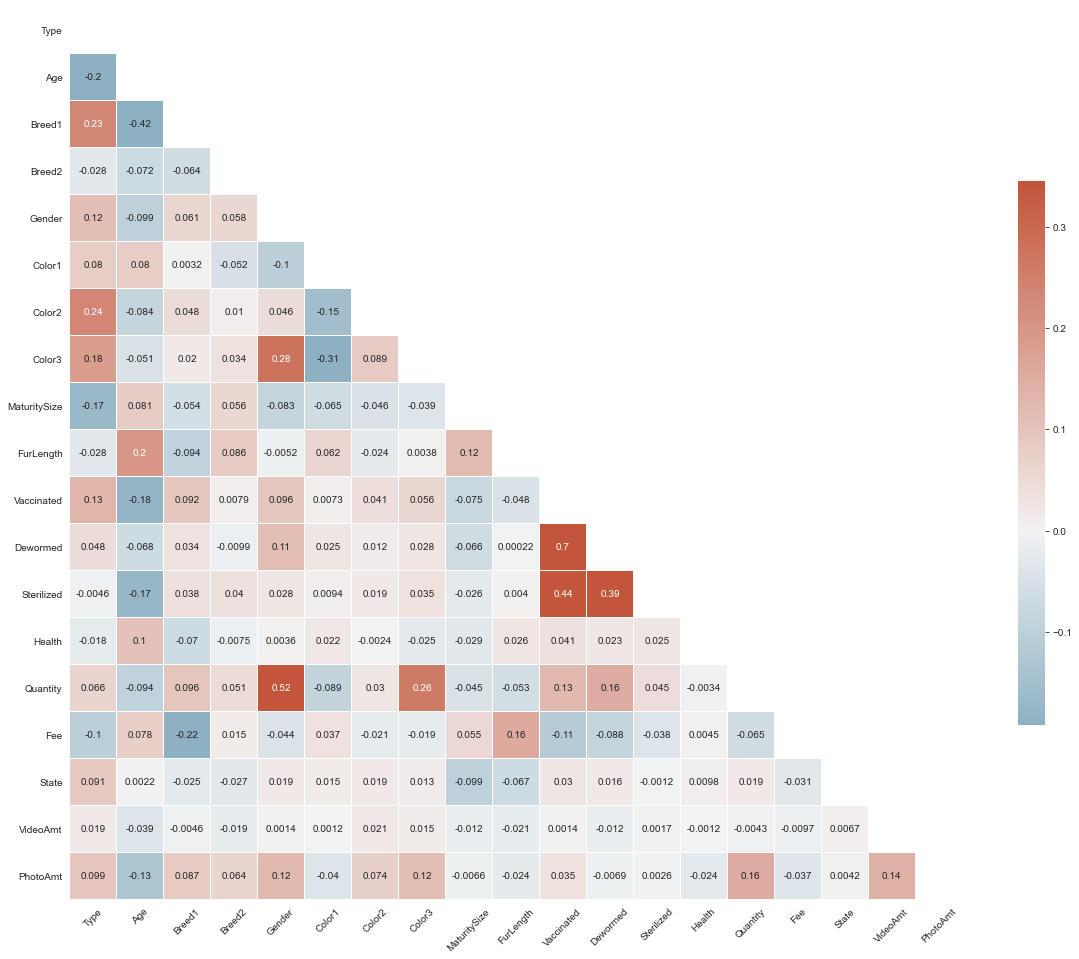

In [82]:
group_corrs(1)

Correlations for Animals with AdoptionSpeed of 2


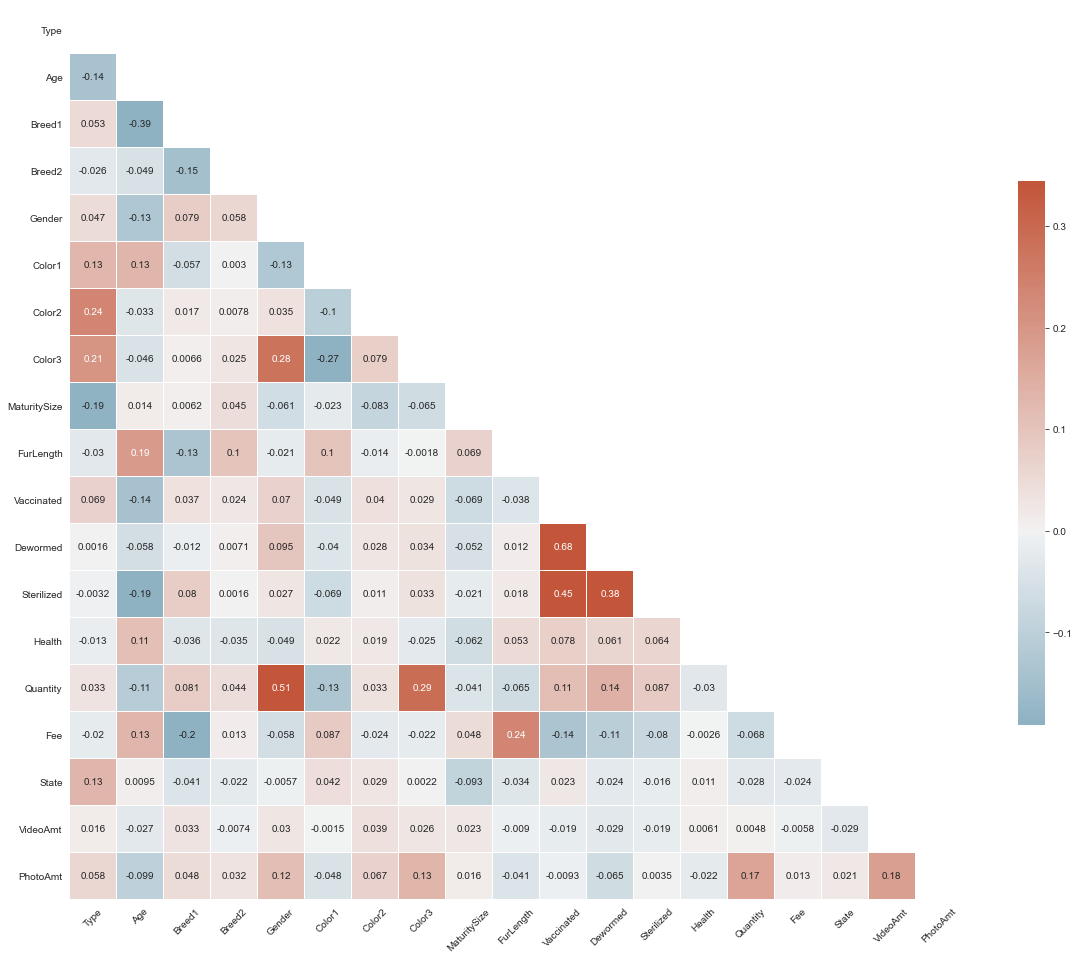

In [83]:
group_corrs(2)

Correlations for Animals with AdoptionSpeed of 3


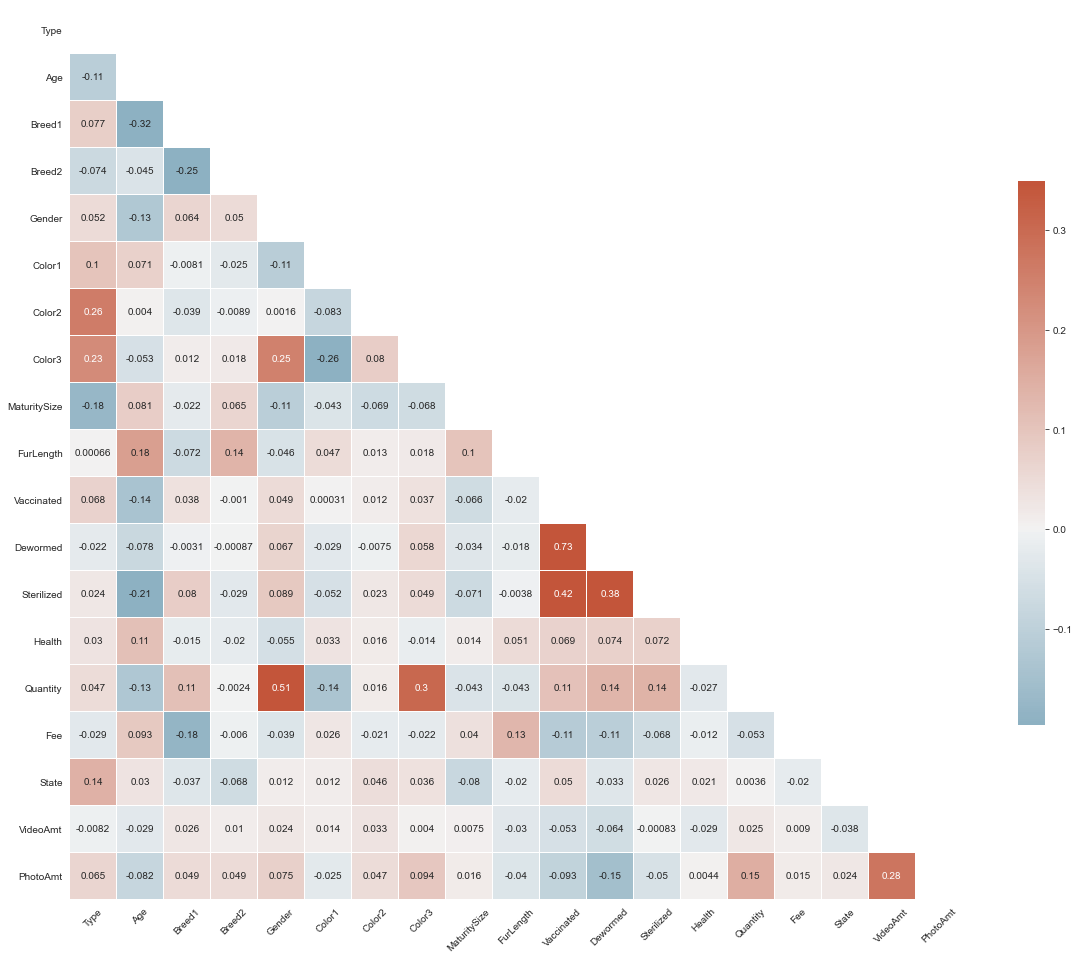

In [84]:
group_corrs(3)

Correlations for Animals with AdoptionSpeed of 4


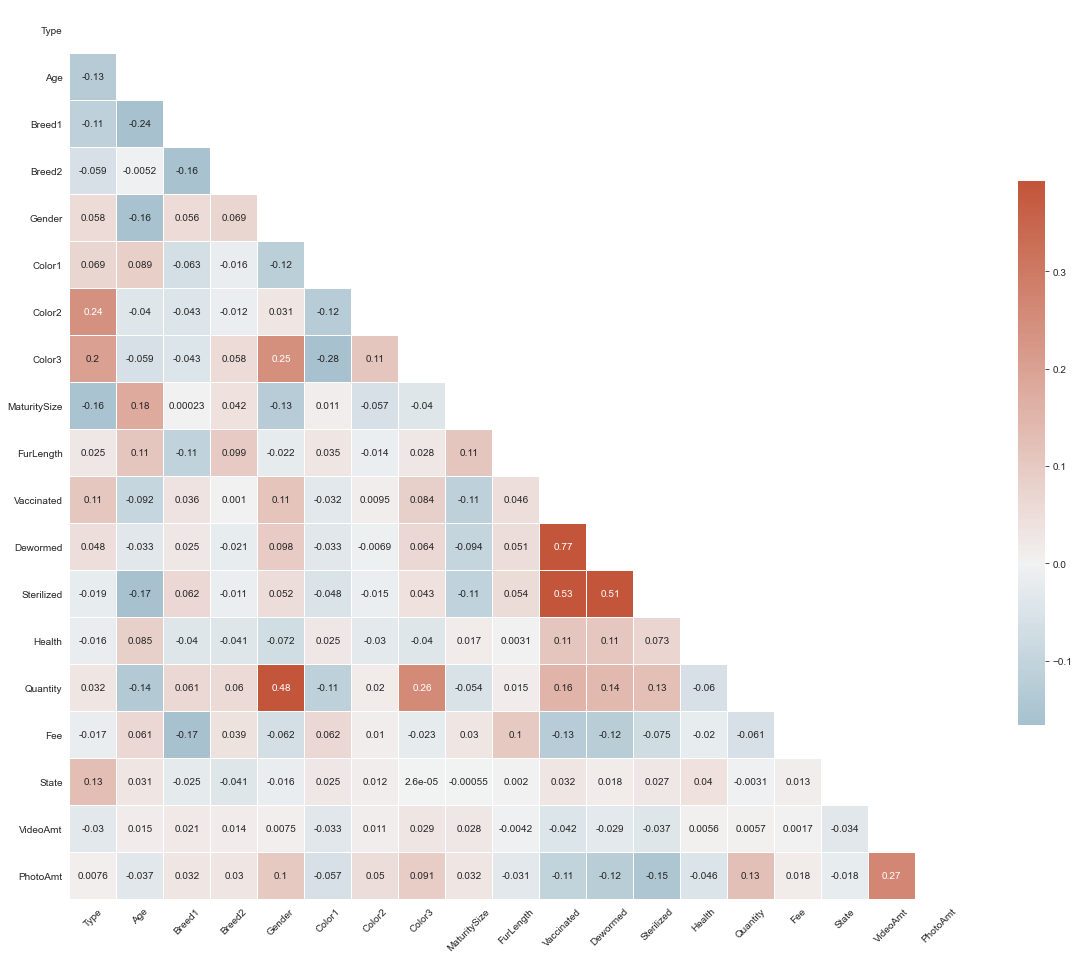

In [85]:
group_corrs(4)

### Adoption Speed (Target Variable)

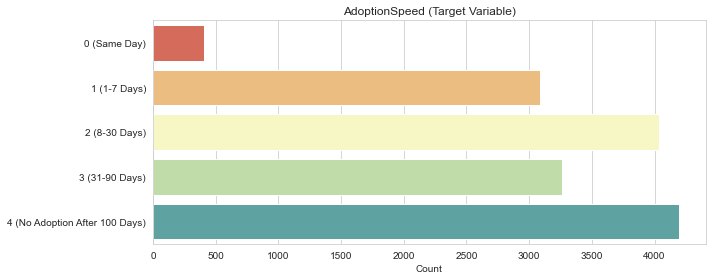

In [8]:
adoptionspeed = pd.DataFrame(train['AdoptionSpeed'].value_counts().rename({0: '0 (Same Day)', 1: '1 (1-7 Days)', 2: '2 (8-30 Days)', 3: '3 (31-90 Days)', 4: '4 (No Adoption After 100 Days)'}))
adoptionspeed['Order'] = [4, 2, 3, 1, 0]
adoptionspeed.sort_values('Order', inplace=True, ascending=True)
count_overview(adoptionspeed['AdoptionSpeed'], 'AdoptionSpeed (Target Variable)')

### Cats vs Dogs (Type)

Number of Animals by Type


AdoptionSpeed,0,1,2,3,4
Type,,,,,
Dog,170,1435,2164,1949,2414
Cat,240,1655,1873,1310,1783


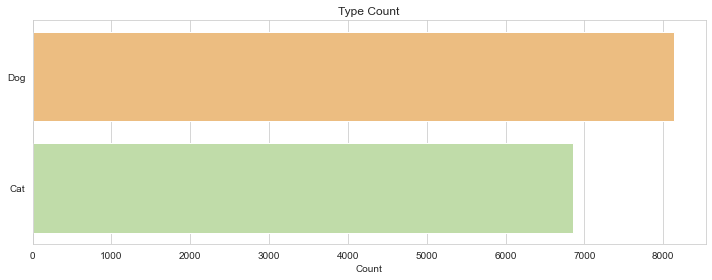

Chi-Square Test of Independence: p-value = 5.010E-34


AdoptionSpeed,0,1,2,3,4
Type,,,,,
Dog,-5.264749,-9.7657,-0.946594,7.208134,5.024245
Cat,5.264749,9.7657,0.946594,-7.208134,-5.024245


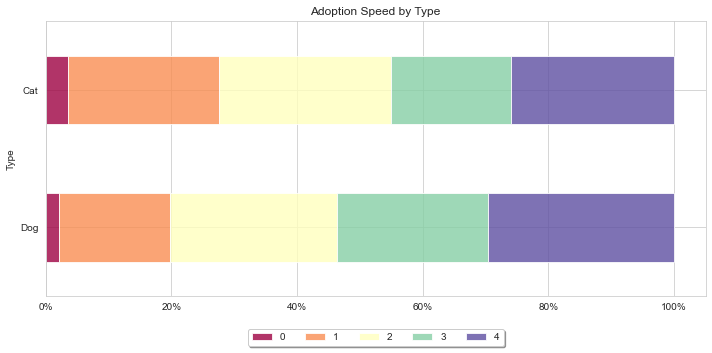

In [9]:
cat_or_dog = train.groupby(['Type', 'AdoptionSpeed']).size().reset_index().pivot(columns='AdoptionSpeed', index='Type', values=0).rename({1: 'Dog', 2: 'Cat'})
print("Number of Animals by Type")
display(cat_or_dog)

ggDF = train['Type'].value_counts().rename({1: 'Dog', 2: 'Cat'})
count_overview(ggDF, 'Type Count')

tab = pd.crosstab(train['Type'], train['AdoptionSpeed']).rename({1: 'Dog', 2: 'Cat'})
table = sm.stats.Table(tab)

print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Adoption Speed by Type")
plt.show()

## Findings:
* It seems cats are more likely to be adopted sooner, compared to dogs. This may be due to the larger responsibility & commitment associated with owning a dog.
* Evidence: 
    * Differences in Adoption Speed between cats and dogs are statistically significant (p-value <<< 0.05)
    * First two adoption periods (0 and 1) exhibit high Chi-Square residuals for cats and low residuals for dogs
    * Last two adoption periods (3 and 4) exhibit low Chi-Square residuals for cats and high residuals for dogsa


### Gender

Number of Animals by Gender


AdoptionSpeed,0,1,2,3,4
Gender,,,,,
Male,160,1283,1578,1109,1406
Female,204,1366,1911,1671,2125
Mixed (Groups of Pets),46,441,548,479,666


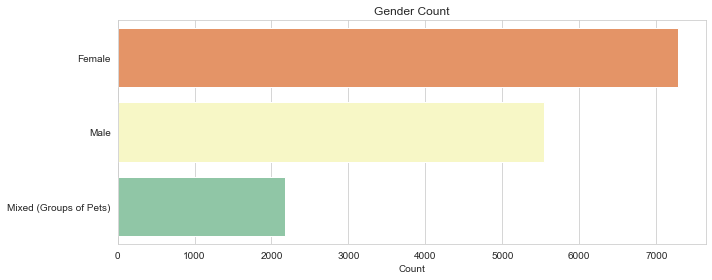

Chi-Square Test of Independence: p-value = 1.871E-13


AdoptionSpeed,0,1,2,3,4
Gender,,,,,
Male,0.893609,5.942875,3.333695,-3.871096,-5.416289
Female,0.501221,-5.403628,-1.782910,3.534435,3.200882
Mixed (Groups of Pets),-1.934038,-0.474798,-2.036183,0.288581,2.876952


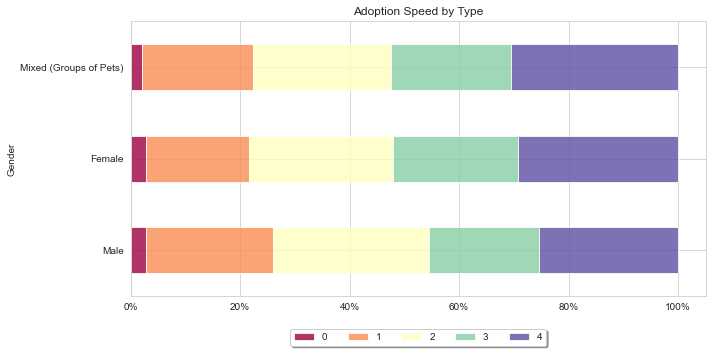

In [10]:
gender_df = train.groupby(['Gender', 'AdoptionSpeed']).size().reset_index().pivot(
    columns='AdoptionSpeed', index='Gender', values=0).rename({1: 'Male', 2: 'Female', 3: 'Mixed (Groups of Pets)'})
print("Number of Animals by Gender")
display(gender_df)

gender_df = train['Gender'].value_counts().rename({1: 'Male', 2: 'Female', 3: 'Mixed (Groups of Pets)'})
count_overview(gender_df, 'Gender Count')

tab = pd.crosstab(train['Gender'], train['AdoptionSpeed']).rename({1: 'Male', 2: 'Female', 3: 'Mixed (Groups of Pets)'})
table = sm.stats.Table(tab)
print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Adoption Speed by Type")
plt.show()

### Age

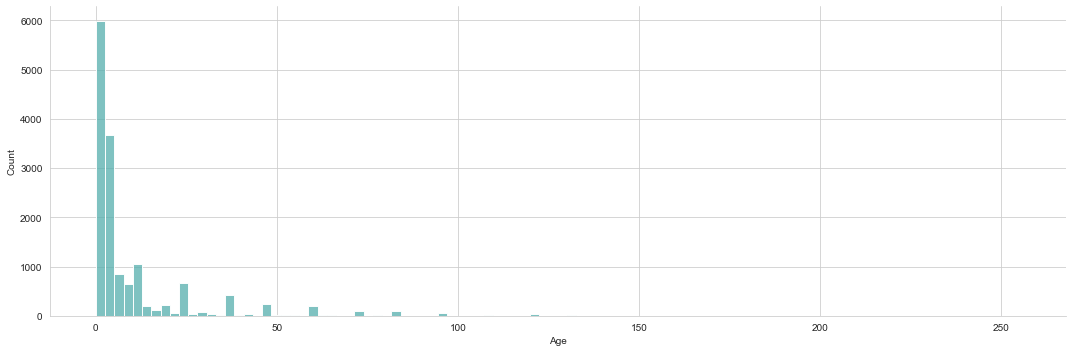

In [11]:
sns.displot(train['Age'], kde=False, bins=100, color=sns.color_palette("Spectral", 5)[4], aspect=3)
plt.show()

<AxesSubplot:xlabel='AdoptionSpeed', ylabel='Age'>

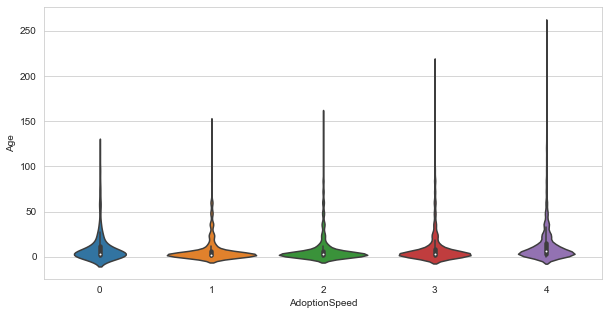

In [95]:
sns.violinplot(x=train['AdoptionSpeed'], y=train['Age'])

Age                                                  
                count       mean        std  min  25%  50%   75%    max
AdoptionSpeed                                                          
0               410.0  10.451220  17.775118  0.0  2.0  3.0  12.0  120.0
1              3090.0   8.488350  15.746187  0.0  2.0  2.0   6.0  147.0
2              4037.0   8.823631  16.779013  0.0  2.0  3.0   6.0  156.0
3              3259.0  10.189936  18.672104  0.0  2.0  3.0   9.0  212.0
4              4197.0  13.667858  20.177460  0.0  3.0  6.0  15.0  255.0

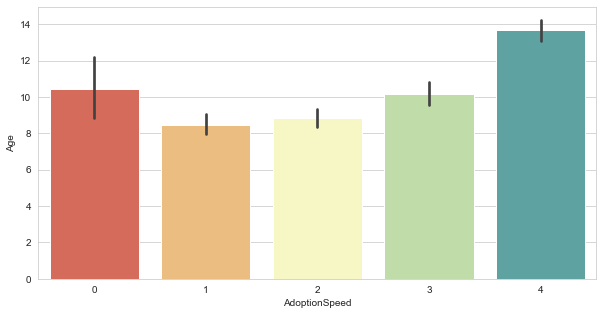

In [13]:
display(train[['AdoptionSpeed', 'Age']].groupby('AdoptionSpeed').describe())
sns.barplot(x=train.AdoptionSpeed, y=train.Age, palette = 'Spectral')
plt.show()

As expected, pets that are not adopted after 100 days (Adoption Speed = 4) are on average much older pets. Interestingly, the pets that were adopted on the same day ranged in all ages. There must be another factor in play that makes people adopt immediately within one day.

Age                                                   
                     count       mean        std  min  25%  50%    75%    max
Type AdoptionSpeed                                                           
1    0               170.0  15.841176  22.413372  0.0  2.0  4.5  20.25  120.0
     1              1435.0  11.891289  19.855107  0.0  2.0  3.0  12.00  132.0
     2              2164.0  10.997227  20.355872  0.0  2.0  2.0   8.00  156.0
     3              1949.0  11.812724  20.258299  0.0  2.0  3.0  12.00  168.0
     4              2414.0  15.896852  23.523003  0.0  2.0  6.0  24.00  255.0
2    0               240.0   6.633333  12.254234  0.0  2.0  3.0   6.00  112.0
     1              1655.0   5.537764  10.124658  0.0  2.0  2.0   4.00  147.0
     2              1873.0   6.312333  10.790752  0.0  2.0  3.0   6.00  144.0
     3              1310.0   7.775573  15.724617  0.0  2.0  3.0   7.00  212.0
     4              1783.0  10.650028  13.912013  0.0  3.0  6.0  12.00  120.0

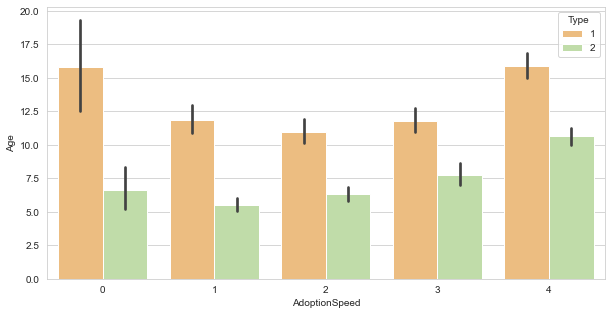

In [14]:
age_type_pivot = train[['AdoptionSpeed', 'Age', 'Type']].groupby(['Type', 'AdoptionSpeed']).describe()
display(age_type_pivot)

g = sns.barplot(x=train.AdoptionSpeed, y=train.Age, palette = 'Spectral', hue=train.Type)
plt.show()

There seems to be a large number of outliers (very old pets), but the median value (50th percentile) is the same for both cats and dogs. The average age of pets up for adoption is 3 months.

*Fun fact*: This coincidences with the end of socialization period and the start of the juvenile period in dogs. Cats on the other hand are still considered kittens for another 3 months.


### PhotoAmt - Can you have too many cute pictures? 

    Spoiler Alert: You can't!

C:\Users\Dell\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


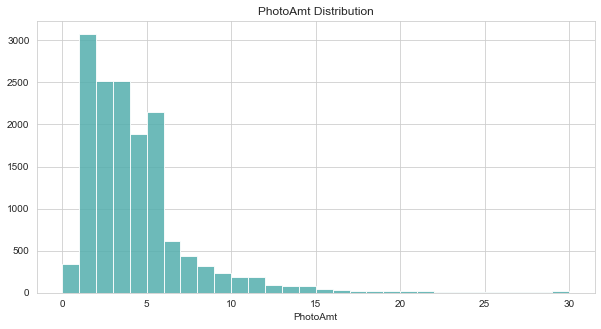

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(train['PhotoAmt'], kde=False, bins=30, hist_kws=dict(alpha=0.85), color=sns.color_palette("Spectral", 5)[4]).set_title('PhotoAmt Distribution')
plt.show()

It's highly unlikely that the difference between 7 and 8 pictures will be the deciding factor for adoption, but we can group the number of photos  into a new variable (***PhotosType***).

The threshold for the number of photos for each class were somewhat arbitrarily, but the histogram above shows a steep drop in PhotoAmt after 5. The ***PhotoType*** classes correspond to the following number of pictures:
> * *No Photos*: 0 photos available
> * *Few Photos*: Between 1-5 photos
> * *Many Photos*: More than 5 photos

In [16]:
train['PhotosType'] = "No Photos"
train['PhotosType'] = np.where(train['PhotoAmt']>1, 'Few Photos', train['PhotosType'])
train['PhotosType'] = np.where(train['PhotoAmt']>5, 'Many Photos', train['PhotosType'])

# test['PhotosType'] = "No Photos"
# test['PhotosType'] = np.where(test['PhotoAmt']>1, 'Few Photos', test['PhotosType'])
# test['PhotosType'] = np.where(test['PhotoAmt']>5, 'Many Photos', test['PhotosType'])

Number of Pets Adopted by Number of Photos Available


AdoptionSpeed,0,1,2,3,4
PhotosType,,,,,
Few Photos,268,2003,2460,1818,2508
Many Photos,43,438,758,815,466
No Photos,99,649,819,626,1223


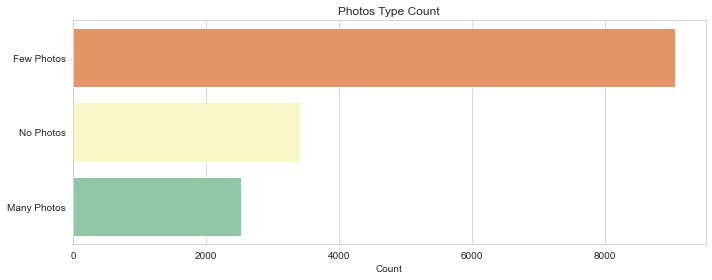

Chi-Square Test of Independence: p-value = 3.302E-76


AdoptionSpeed,0,1,2,3,4
PhotosType,,,,,
Few Photos,2.081322,5.630655,0.802700,-6.101690,-1.016624
Many Photos,-3.470047,-4.393020,3.912735,14.150472,-11.647052
No Photos,0.666870,-2.648652,-4.424175,-5.501059,11.568863


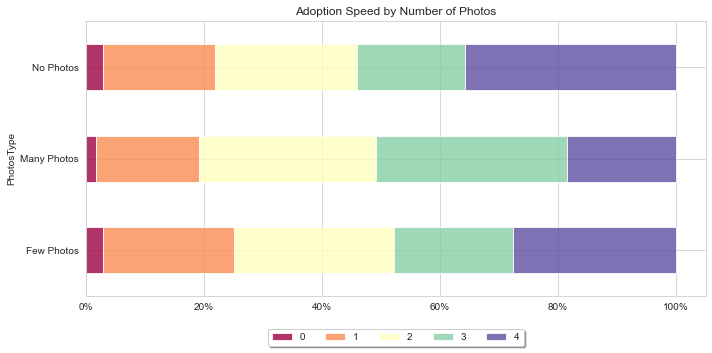

In [17]:
df_plot = train.groupby(['PhotosType', 'AdoptionSpeed']).size().reset_index().pivot(
    columns='AdoptionSpeed', index='PhotosType', values=0)
print("Number of Pets Adopted by Number of Photos Available")
display(df_plot)

ggDF = train['PhotosType'].value_counts()
count_overview(ggDF, 'Photos Type Count')

tab = pd.crosstab(train['PhotosType'], train['AdoptionSpeed'])
table = sm.stats.Table(tab)
print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Adoption Speed by Number of Photos")
plt.show()

### Findings
Having no photos seems to be a big factor associated with pets not being adopted after 100 days.

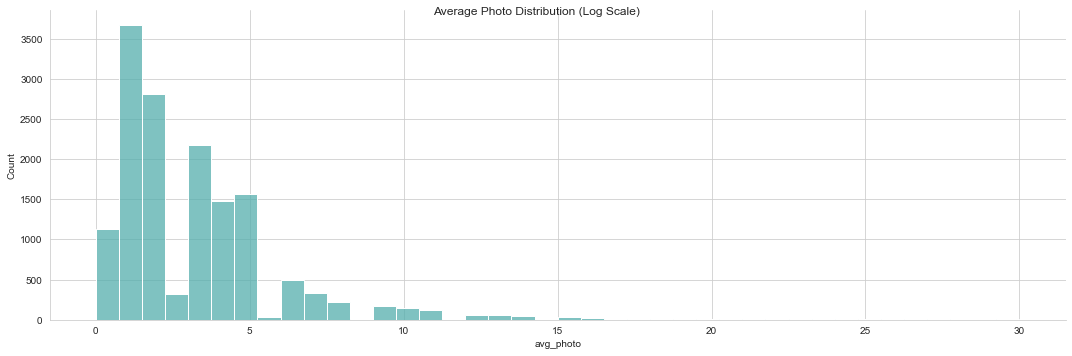

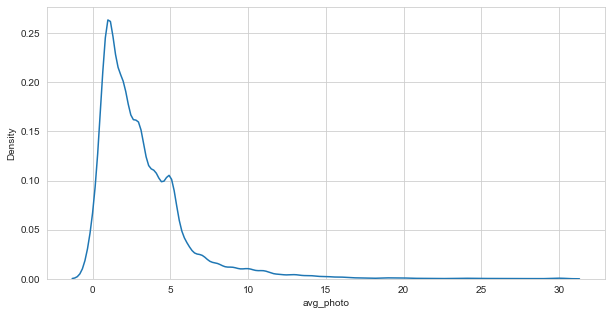

In [253]:
data_df = train.copy(deep=True)
data_df['avg_photo'] = data_df['PhotoAmt']/data_df['Quantity']
ax = sns.displot(data_df['avg_photo'], kde=False, bins=40, color=sns.color_palette("Spectral", 5)[4], log_scale=(False, False), aspect=3).fig.suptitle('Average Photo Distribution (Log Scale)')
plt.show()

sns.kdeplot(x=data_df['avg_photo'])
plt.show()

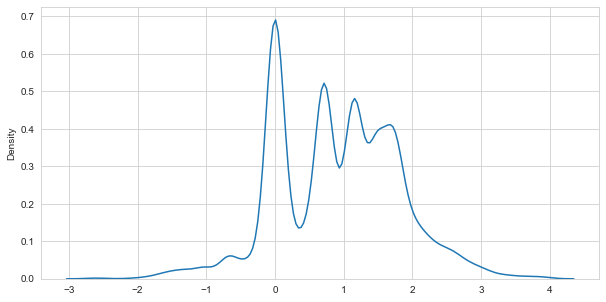

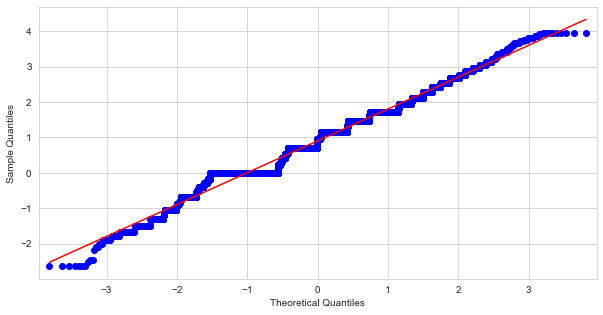

In [261]:
xt, _ = boxcox(data_df[data_df['avg_photo'] != 0]['avg_photo'])
sns.kdeplot(xt)
plt.show()

sm.qqplot(xt, line='s')
plt.show()

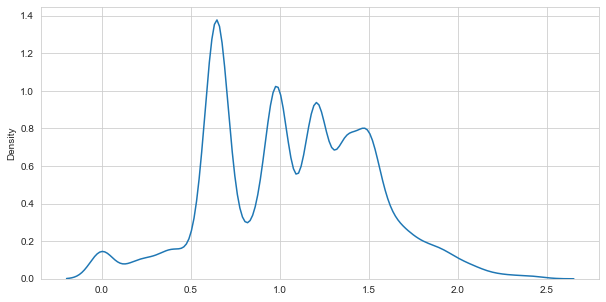

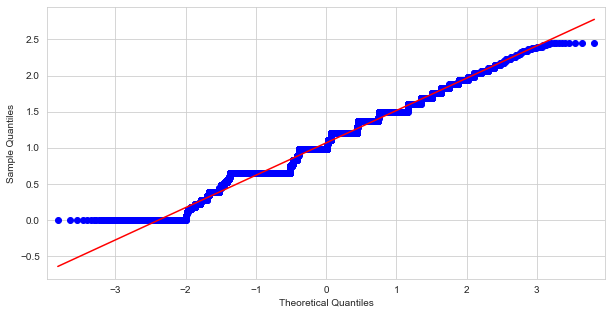

In [268]:
# log(x+1)

xt, _ = boxcox(data_df['avg_photo']+1)
sns.kdeplot(xt)
plt.show()

sm.qqplot(xt, line='s')
plt.show()


### Location (Location, Location)

AdoptionSpeed,0,1,2,3,4,Total
State,,,,,,
Melaka,4,18,23,12,80,137
Kedah,3,14,34,23,36,110
Selangor,246,1877,2435,2004,2152,8714
Pulau Pinang,8,122,216,197,300,843
Perak,3,48,111,117,141,420
Negeri Sembilan,4,36,63,42,108,253
Pahang,3,29,14,16,23,85
Johor,23,113,136,103,132,507
Sarawak,1,1,0,2,9,13


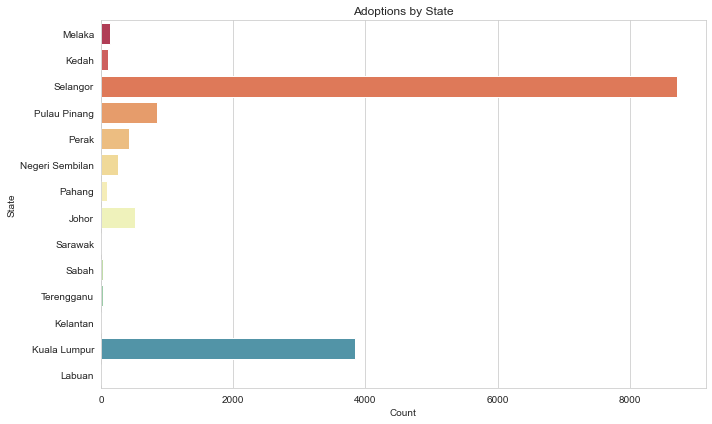

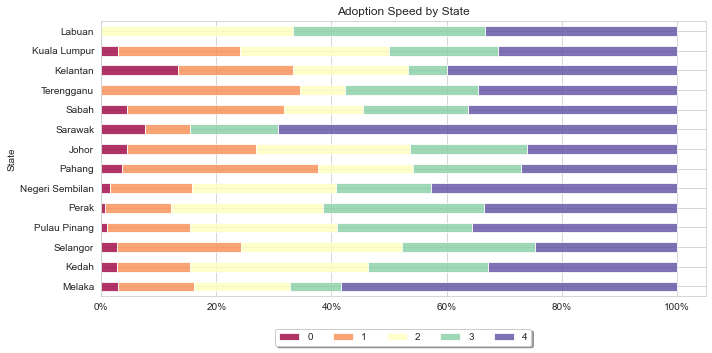

In [18]:
states = pd.read_csv('../data/state_labels.csv')
states.index = states['StateID']
states_dict = states.to_dict()

state_counts = pd.crosstab(train['State'], train['AdoptionSpeed'])
state_counts.index = state_counts.index.map(states_dict['StateName'])

state_totals = state_counts.copy(deep=True)
state_totals['Total'] = state_counts.sum(axis=1)
display(state_totals)


plt.figure(figsize=(10,6))
ax = sns.barplot(x=state_totals.Total, y = state_totals.index, palette="Spectral")
ax.set_title("Adoptions by State")
plt.xlabel('Count')
plt.tight_layout()
plt.show()


stacked_barplot(state_counts, 'Adoption Speed by State')

### Findings
There is a clear difference in adoption speeds between the different states. Sarawak and Melaka have the highest proportion of pets left unadopted after 100 days compared to Kelatan and Sarawak, which have the lowest proportions.

### Purebreed vs Mudblood Mutts?

Number of Pets Adopted by Number of Photos Available


AdoptionSpeed,0,1,2,3,4
Purebreed,,,,,
Mixed Breed,157,876,1133,992,1073
Pure Breed,253,2214,2904,2267,3124


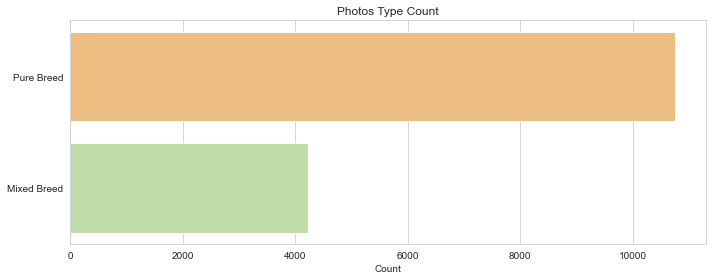

Chi-Square Test of Independence: p-value = 9.746E-09


AdoptionSpeed,0,1,2,3,4
Purebreed,,,,,
Mixed Breed,4.595,0.179756,-0.255053,3.181495,-4.501907
Pure Breed,-4.595,-0.179756,0.255053,-3.181495,4.501907


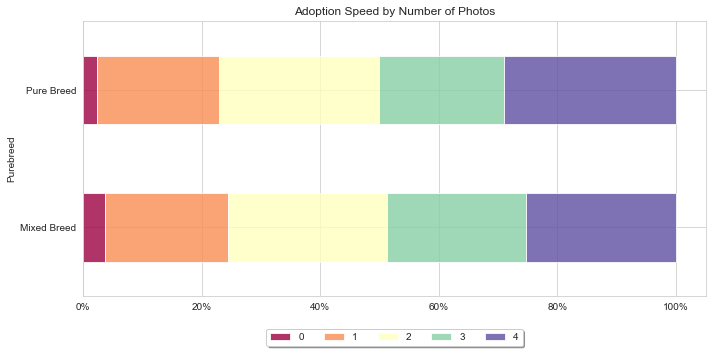

In [19]:
train['Purebreed'] = np.where(train['Breed2'] == 0, 'Pure Breed', 'Mixed Breed')
test['Purebreed'] = np.where(test['Breed2'] == 0, 'Pure Breed', 'Mixed Breed')

df_plot = train.groupby(['Purebreed', 'AdoptionSpeed']).size().reset_index().pivot(
    columns='AdoptionSpeed', index='Purebreed', values=0)
print("Number of Pets Adopted by Number of Photos Available")
display(df_plot)

ggDF = train['Purebreed'].value_counts()
count_overview(ggDF, 'Photos Type Count')

tab = pd.crosstab(train['Purebreed'], train['AdoptionSpeed'])
table = sm.stats.Table(tab)
print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Adoption Speed by Number of Photos")
plt.show()

### Findings
Mixed breeds seem to be adopted faster than pure breeds

In [23]:
labels_breed = pd.read_csv('../data/breed_labels.csv')
labels_breed.rename(index=str, columns={'BreedName':'Breed1Name'},inplace=True)
labels_breed['Breed2Name'] = labels_breed['Breed1Name'].values
labels_breed

,BreedID,Type,Breed1Name,Breed2Name
0,1,1,Affenpinscher,Affenpinscher
1,2,1,Afghan Hound,Afghan Hound
2,3,1,Airedale Terrier,Airedale Terrier
3,4,1,Akbash,Akbash
4,5,1,Akita,Akita
...,...,...,...,...
302,302,2,Torbie,Torbie
303,303,2,Tortoiseshell,Tortoiseshell
304,304,2,Turkish Angora,Turkish Angora
305,305,2,Turkish Van,Turkish Van


In [54]:
data_df = train.copy(deep=True)
data_df = data_df.merge(labels_breed[['BreedID','Breed1Name']], left_on='Breed1', right_on='BreedID', how='left')
data_df.drop('BreedID',axis=1,inplace=True)
data_df = data_df.merge(labels_breed[['BreedID','Breed2Name']], left_on='Breed2', right_on='BreedID', how='left')
data_df.drop('BreedID',axis=1,inplace=True)
data_df['Breed2Name'].fillna('',inplace=True)
data_df['BreedName_full'] = data_df['Breed1Name'] + ' ' + data_df['Breed2Name']
data_df['BreedName_full'].fillna('',inplace=True)
data_df['BreedName_full'] = data_df['BreedName_full'].str.lower()
data_df[['BreedName_full','Breed1', 'Breed2', 'Breed1Name', 'Breed2Name', 'AdoptionSpeed', 'Type']].head()

,BreedName_full,Breed1,Breed2,Breed1Name,Breed2Name,AdoptionSpeed,Type
0,tabby,299,0,Tabby,,2,2
1,domestic medium hair,265,0,Domestic Medium Hair,,0,2
2,mixed breed,307,0,Mixed Breed,,3,1
3,mixed breed,307,0,Mixed Breed,,2,1
4,mixed breed,307,0,Mixed Breed,,2,1


In [65]:
data_df['breed_num'] = 1
data_df['breed_num'] += data_df['Breed2'].apply(lambda x: 1 if x!=0 else 0)
data_df['mixed_breed'] = data_df['BreedName_full'].apply(lambda x: x.find('mixed')>=0).astype(int)
data_df['domestic_breed'] = data_df['BreedName_full'].apply(lambda x: x.find('domestic')>=0).astype(int)
data_df['pure_breed'] = ((data_df['breed_num']==1)&(data_df['mixed_breed']==0)).astype(int)
breed_df = data_df[['BreedName_full','Breed1', 'Breed2', 'Breed1Name', 'Breed2Name', 'AdoptionSpeed', 'Type', 'mixed_breed', 'domestic_breed', 'pure_breed']]
breed_df


,BreedName_full,Breed1,Breed2,Breed1Name,Breed2Name,AdoptionSpeed,Type,mixed_breed,domestic_breed,pure_breed
0,tabby,299,0,Tabby,,2,2,0,0,1
1,domestic medium hair,265,0,Domestic Medium Hair,,0,2,0,1,1
2,mixed breed,307,0,Mixed Breed,,3,1,1,0,0
3,mixed breed,307,0,Mixed Breed,,2,1,1,0,0
4,mixed breed,307,0,Mixed Breed,,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14988,domestic short hair,266,0,Domestic Short Hair,,2,2,0,1,1
14989,domestic medium hair domestic long hair,265,264,Domestic Medium Hair,Domestic Long Hair,4,2,0,1,0
14990,domestic medium hair domestic short hair,265,266,Domestic Medium Hair,Domestic Short Hair,3,2,0,1,0
14991,domestic short hair,266,0,Domestic Short Hair,,4,2,0,1,1


Adoption Speed Based on Breed Type


AdoptionSpeed,0,1,2,3,4
variable,,,,,
domestic_breed,178,1345,1559,1113,1408
mixed_breed,101,985,1754,1634,2175
pure_breed,199,1572,1707,1198,1551


Chi-Square Test of Independence: p-value = 7.456E-79


AdoptionSpeed,0,1,2,3,4
variable,,,,,
domestic_breed,3.333783,6.347867,1.327315,-3.247983,-5.312126
mixed_breed,-6.854697,-15.735366,-1.800959,8.024685,11.213914
pure_breed,3.718240,9.804490,0.537934,-4.989654,-6.220693


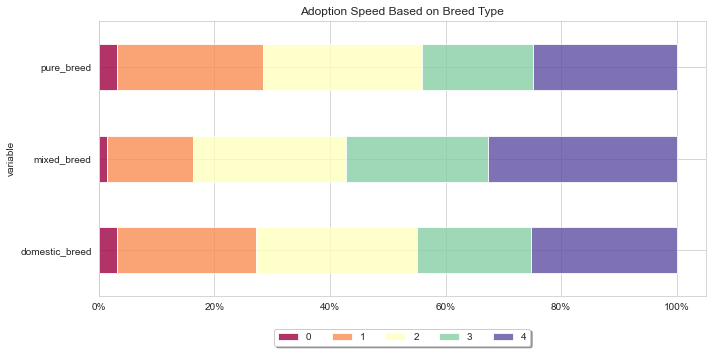

In [91]:
df_plot = data_df[['mixed_breed','domestic_breed', 'pure_breed', 'AdoptionSpeed']].melt(id_vars='AdoptionSpeed').groupby(['AdoptionSpeed', 'variable']).sum().reset_index().pivot(
columns='AdoptionSpeed', index='variable', values='value')
print("Adoption Speed Based on Breed Type")
display(df_plot)

table = sm.stats.Table(df_plot)
print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(df_plot)[1]))
display(table.standardized_resids)

stacked_barplot(df_plot, "Adoption Speed Based on Breed Type")
plt.show()

### Findings
Once the domestic breeds are separated from the mixed breeds, it is apparent that mixed breeds are the slowest to be adopted


### What's better than free?

First, let's see the distribution of fees

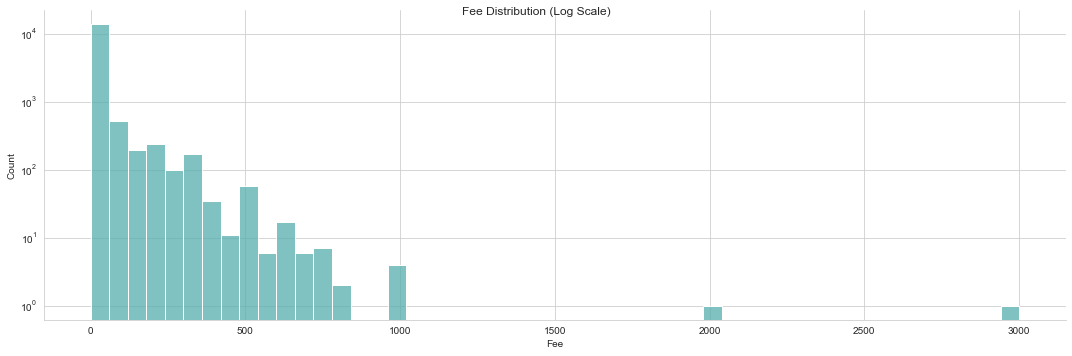

In [53]:
ax = sns.displot(train['Fee'], kde=False, bins=50, color=sns.color_palette("Spectral", 5)[4], log_scale=(False, True), aspect=3).fig.suptitle('Fee Distribution (Log Scale)')

* *Note*: The fee cost on the y-axis is in log scale. So there is several thousand more pets up for adoption with no cost than at any price.

Let's convert the fee variable into a new categorical variable (***PayorNot***). This group is composed of:
> * Free - No fee associated with adoption
> * Paid Adoption - Fee associated with adoption 

Number of Pets Adopted by Number of Photos Available


AdoptionSpeed,0,1,2,3,4
PayorNot,,,,,
Free,357,2611,3430,2789,3476
Paid Adoption,53,479,607,470,721


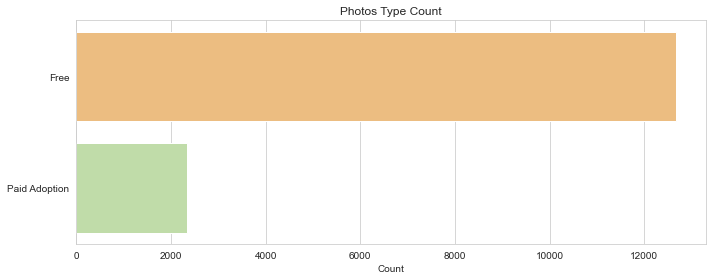

Chi-Square Test of Independence: p-value = 5.575E-03


AdoptionSpeed,0,1,2,3,4
PayorNot,,,,,
Free,1.481222,0.067103,1.03537,1.993102,-3.452485
Paid Adoption,-1.481222,-0.067103,-1.03537,-1.993102,3.452485


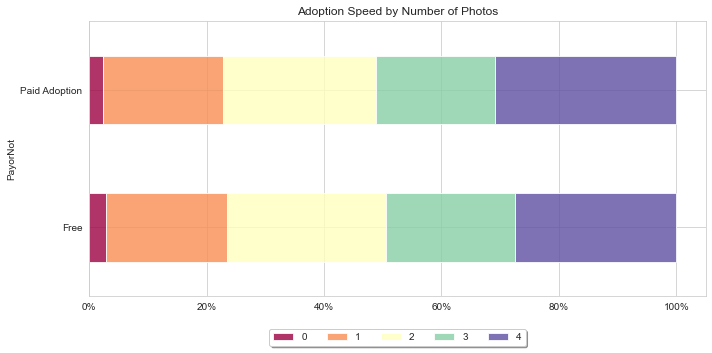

In [115]:
train['PayorNot'] = np.where(train['Fee'] == 0, 'Free', 'Paid Adoption')

df_plot = train.groupby(['PayorNot', 'AdoptionSpeed']).size().reset_index().pivot(
    columns='AdoptionSpeed', index='PayorNot', values=0).rename({0: 'Free', 1: 'Paid Adoption'})
print("Number of Pets Adopted by Number of Photos Available")
display(df_plot)

ggDF = train['PayorNot'].value_counts()
count_overview(ggDF, 'Photos Type Count')

tab = pd.crosstab(train['PayorNot'], train['AdoptionSpeed'])
table = sm.stats.Table(tab)
print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Adoption Speed by Number of Photos")
plt.show()

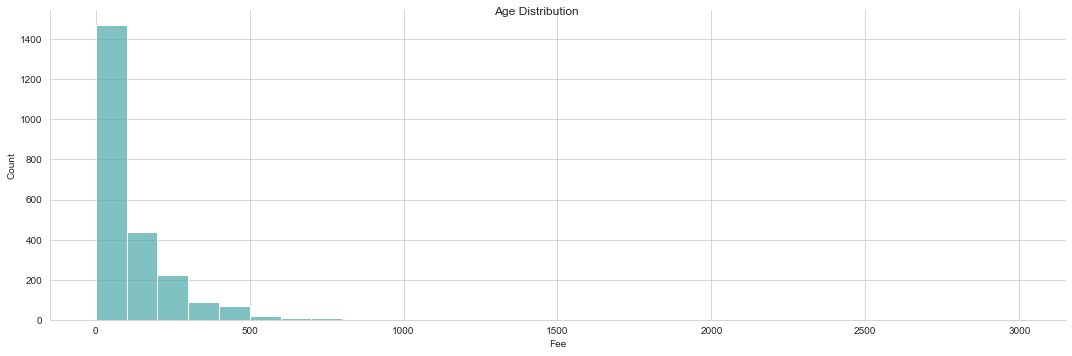

In [116]:
ax = sns.displot(train[train['PayorNot'] != 'Free']['Fee'], kde=False, bins=30, color=sns.color_palette("Spectral", 5)[4], aspect=3).fig.suptitle('Age Distribution')

* The effects of a fee seems negligible, but there is some evidence that pets that are not adopted after the 100 days are likely to have a fee associated with them. This might be due to the adoption shelters attempting to recoup their costs.

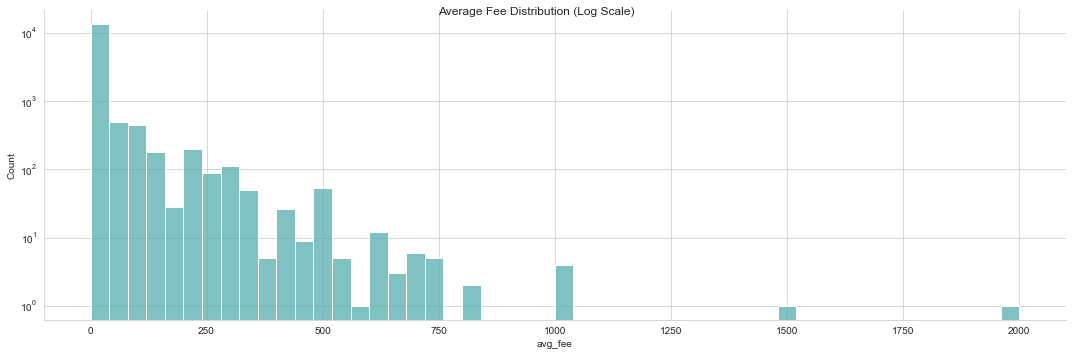

In [94]:
# Average Fee

data_df = train.copy(deep=True)
data_df['avg_fee'] = data_df['Fee']/data_df['Quantity']
ax = sns.displot(data_df['avg_fee'], kde=False, bins=50, color=sns.color_palette("Spectral", 5)[4], log_scale=(False, True), aspect=3).fig.suptitle('Average Fee Distribution (Log Scale)')
plt.show()

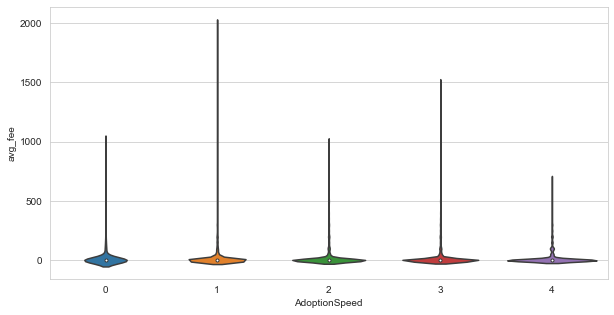

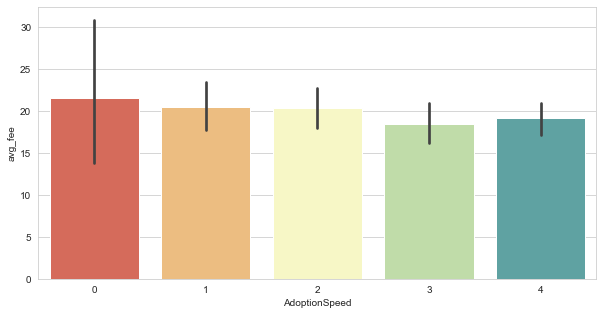

In [96]:
sns.violinplot(x=data_df['AdoptionSpeed'], y=data_df['avg_fee'])
plt.show()

g = sns.barplot(x=data_df.AdoptionSpeed, y=data_df.avg_fee, palette = 'Spectral')
plt.show()

In [223]:
from statsmodels.formula.api import ols

test_data_df = data_df[['avg_fee', 'Fee', 'AdoptionSpeed']].dropna()
test_data_df = test_data_df[test_data_df['Fee'] != 0]
test_data_df['Fee'], _ = boxcox(test_data_df['Fee'])
test_data_df['avg_fee'], _ = boxcox(test_data_df['avg_fee'])

Shapiro-Wilk Normality Test for Fee: Test Statistic = 9.81e-01, P-Value = 2.83e-17


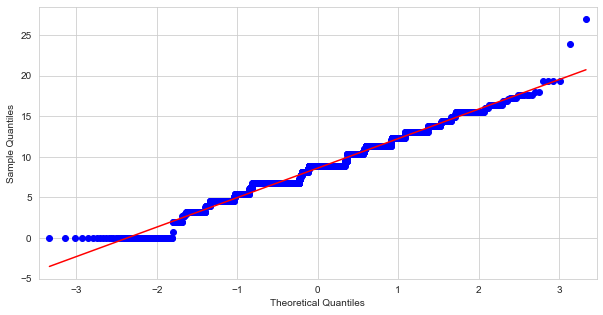

Shapiro-Wilk Normality Test for avg_fee: Test Statistic = 9.88e-01, P-Value = 6.71e-13


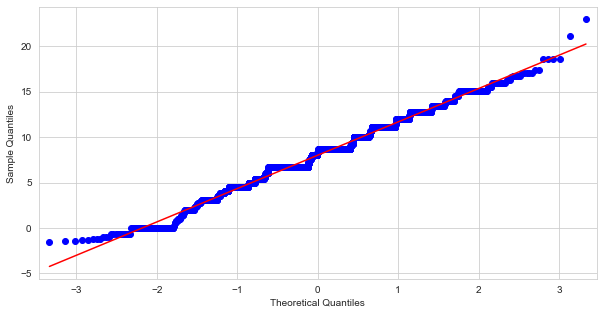

In [241]:
# Normality Check

w, pvalue = stats.shapiro(test_data_df['Fee'])
print(f'Shapiro-Wilk Normality Test for Fee: Test Statistic = {w:.2e}, p-Value = {pvalue:.2e}')
sm.qqplot(test_data_df['Fee'] ,line='s')
plt.show()

w, pvalue = stats.shapiro(test_data_df['avg_fee'])
print(f'Shapiro-Wilk Normality Test for avg_fee: Test Statistic = {w:.2e}, p-Value = {pvalue:.2e}')
sm.qqplot(test_data_df['avg_fee'] ,line='s')
plt.show()

In [245]:
# Homogeneity of Variance Assumption check (p-value > 0.05 is ideal -- Does not reject equality of variances)



w, pvalue = stats.levene(test_data_df[test_data_df['AdoptionSpeed']==0]['Fee'],
             test_data_df[test_data_df['AdoptionSpeed']==1]['Fee'],
             test_data_df[test_data_df['AdoptionSpeed']==2]['Fee'],
             test_data_df[test_data_df['AdoptionSpeed']==3]['Fee'],
             test_data_df[test_data_df['AdoptionSpeed']==4]['Fee'])
print(f"Levene Test for Fee: Test statistic = {w}, p-value = {pvalue}")


w, pvalue = stats.levene(test_data_df[test_data_df['AdoptionSpeed']==0]['avg_fee'],
             test_data_df[test_data_df['AdoptionSpeed']==1]['avg_fee'],
             test_data_df[test_data_df['AdoptionSpeed']==2]['avg_fee'],
             test_data_df[test_data_df['AdoptionSpeed']==3]['avg_fee'],
             test_data_df[test_data_df['AdoptionSpeed']==4]['avg_fee'])
print(f"Levene Test for avg_fee: Test statistic = {w}, p-value = {pvalue}")

Levene Test for Fee: Test statistic = 3.29038846184955, p-value = 0.010657374523686099
Levene Test for avg_fee: Test statistic = 1.5592771983925195, p-value = 0.18251834844795561


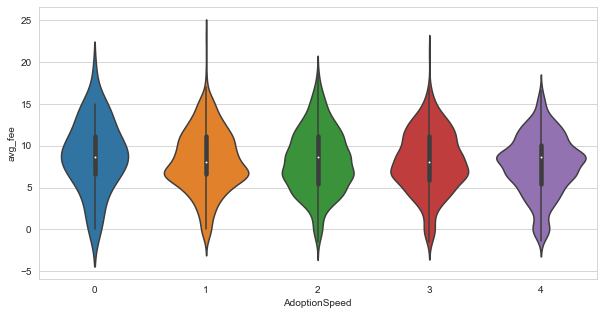

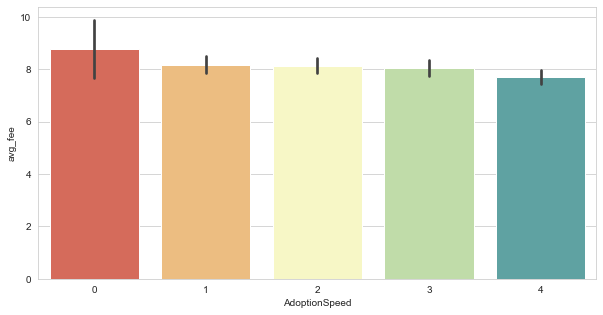

In [225]:
sns.violinplot(x=test_data_df['AdoptionSpeed'], y=test_data_df['avg_fee'])
plt.show()

g = sns.barplot(x=test_data_df.AdoptionSpeed, y=test_data_df.avg_fee, palette = 'Spectral')
plt.show()

Overall model F( 4, 2325) =  0.895, p =  0.4662  
  



,sum_sq,df,F,PR(>F)
C(AdoptionSpeed),47.298866,4.0,0.894595,0.466242
Residual,30731.748815,2325.0,NaN,NaN


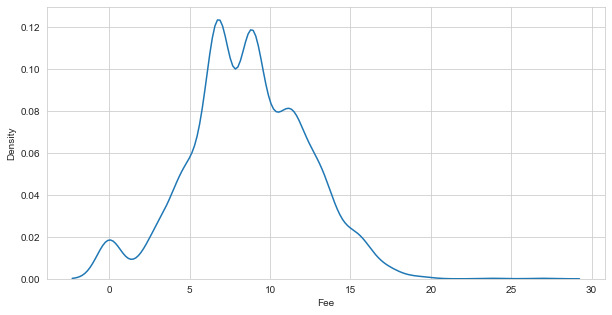

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Fee   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8946
Date:                Tue, 22 Dec 2020   Prob (F-statistic):              0.466
Time:                        17:09:32   Log-Likelihood:                -6311.2
No. Observations:                2330   AIC:                         1.263e+04
Df Residuals:                    2325   BIC:                         1.266e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.2711      0.499     18.565      0.000       8.292      10.250
C(AdoptionSpeed)[T.1]    -0.6176      0.526     -1.173      0.241      -1.650       0.414
C(AdoptionSpeed)[T.2]    -0.5759      0.521     -1.106      0.269      -1.597       0.445
C(AdoptionSpeed)[T.3]    -0.6427      0.527     -1.220      0.223      -1.676       0.390
C(AdoptionSpeed)[T.4]    -0.8220      0.517     -1.589      0.112      -1.837       0.193
==============================================================================
Omnibus:                        6.666   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                8.083
Skew:                           0.005   Prob(JB):                       0.0176
Kurtosis:                       3.288   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
model = ols('Fee ~ C(AdoptionSpeed)', test_data_df).fit()
res = sm.stats.anova_lm(model, typ= 2)

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}  \n  \n")
display(res)
sns.kdeplot(x=test_data_df['Fee'])
plt.show()
display(model.summary())

Overall model F( 4, 2325) =  2.095, p =  0.0790  
  



,sum_sq,df,F,PR(>F)
C(AdoptionSpeed),112.858322,4.0,2.094819,0.078997
Residual,31314.830152,2325.0,NaN,NaN


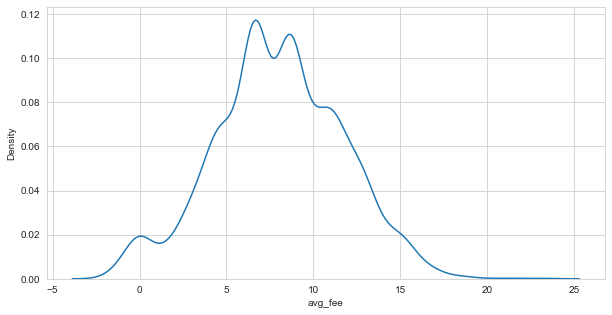

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_fee   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.095
Date:                Tue, 22 Dec 2020   Prob (F-statistic):             0.0790
Time:                        17:09:33   Log-Likelihood:                -6333.1
No. Observations:                2330   AIC:                         1.268e+04
Df Residuals:                    2325   BIC:                         1.270e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.7575      0.504     17.372      0.000       7.769       9.746
C(AdoptionSpeed)[T.1]    -0.6069      0.531     -1.142      0.253      -1.649       0.435
C(AdoptionSpeed)[T.2]    -0.6241      0.526     -1.187      0.235      -1.655       0.407
C(AdoptionSpeed)[T.3]    -0.6929      0.532     -1.303      0.193      -1.736       0.350
C(AdoptionSpeed)[T.4]    -1.0434      0.522     -1.998      0.046      -2.068      -0.019
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.955
Skew:                          -0.031   Prob(JB):                        0.620
Kurtosis:                       2.923   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
model = ols('avg_fee ~ C(AdoptionSpeed)', test_data_df).fit()
res = sm.stats.anova_lm(model, typ= 2)

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}  \n  \n")
display(res)
sns.kdeplot(x=test_data_df['avg_fee'])
plt.show()
display(model.summary())

In [228]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(test_data_df['Fee'], test_data_df['AdoptionSpeed'])
mc_results = mc.tukeyhsd()
print(f'Results of TukeyHSD for Fee \n  \n {mc_results} \n \n')

mc = MultiComparison(test_data_df['avg_fee'], test_data_df['AdoptionSpeed'])
mc_results = mc.tukeyhsd()
print(f'Results of TukeyHSD for Average Fee \n  \n {mc_results} \n \n')

Results of TukeyHSD for Fee 
  
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.6176 0.7394 -2.0543 0.8192  False
     0      2  -0.5759 0.7777 -1.9975 0.8456  False
     0      3  -0.6427  0.713 -2.0809 0.7954  False
     0      4   -0.822 0.5039 -2.2345 0.5905  False
     1      2   0.0417    0.9 -0.5649 0.6482  False
     1      3  -0.0251    0.9 -0.6695 0.6192  False
     1      4  -0.2044  0.864 -0.7895 0.3806  False
     2      3  -0.0668    0.9 -0.6766  0.543  False
     2      4  -0.2461 0.7081 -0.7928 0.3007  False
     3      4  -0.1793    0.9 -0.7677 0.4091  False
--------------------------------------------------- 
 

Results of TukeyHSD for Average Fee 
  
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.6069 0.7571 -2.0572 

### Findings

Even after removing records with a fee of 0, we can't find a statistical significance between the fee and adoption speed.
* avg_fee gets close though (p-value = 0.07), try to add it eventually and see if the model improves

### Length of Description

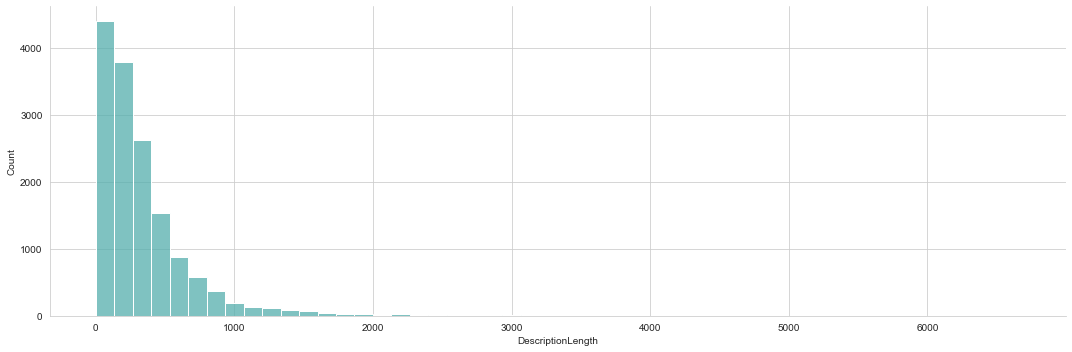

In [56]:
train['DescriptionLength'] = train['Description'].apply(lambda x: len(str(x)))
sns.displot(train['DescriptionLength'], kde=False, bins=50, color=sns.color_palette("Spectral", 5)[4], aspect=3)

<AxesSubplot:xlabel='AdoptionSpeed', ylabel='DescriptionLength'>

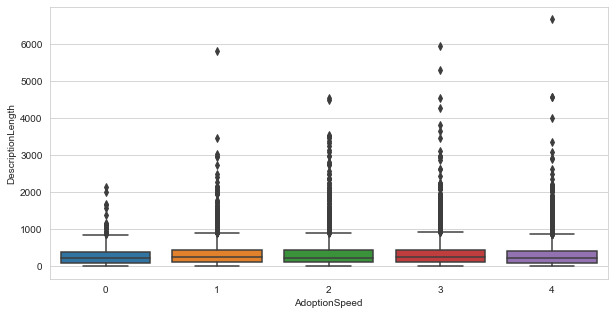

In [58]:
sns.boxplot(x = train['AdoptionSpeed'], y = train['DescriptionLength'])

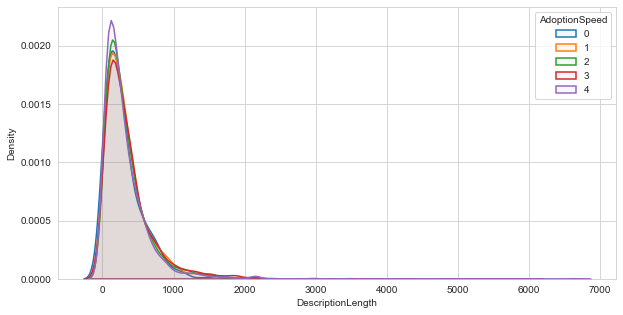

In [103]:
gr = train.groupby('AdoptionSpeed').DescriptionLength

for adoptionspeed, desc_length in gr:
    ax = sns.kdeplot(desc_length, label=adoptionspeed, shade=True, alpha=0.05, linewidth=1.5).legend(title='AdoptionSpeed')

# Feature Engineering

### Name or Not

* The only variable with missing values is the "Name". 
* My intuition is that people are more likely to respond positively to listed pets with existing names. Imagine a little girl saying:
    * "Aww, look how cute '*Peanut*' is!"

Let's test the hypothesis that the name would play a role in the Adoption Speed. First, we define a new variable ("NameorNot"), then conduct a chi-squared enrichment analysis. Lastly, we examine the standardized residuals to see any effects.

Number of Animals by Type


AdoptionSpeed,0,1,2,3,4
NameorNot,,,,,
Has a Name,384,2819,3725,3043,3765
No Name,26,271,312,216,432


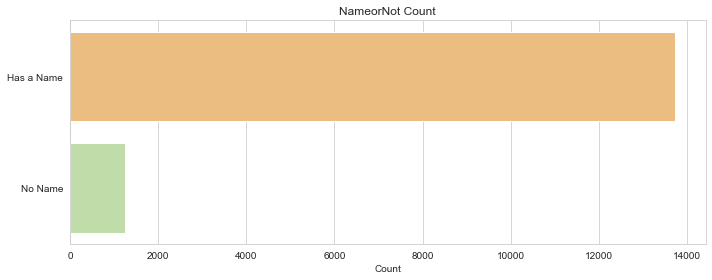

Chi-Square Test of Independence: p-value = 1.076E-07


AdoptionSpeed,0,1,2,3,4
NameorNot,,,,,
Has a Name,1.513055,-0.869614,1.757704,4.0889,-5.259132
No Name,-1.513055,0.869614,-1.757704,-4.0889,5.259132


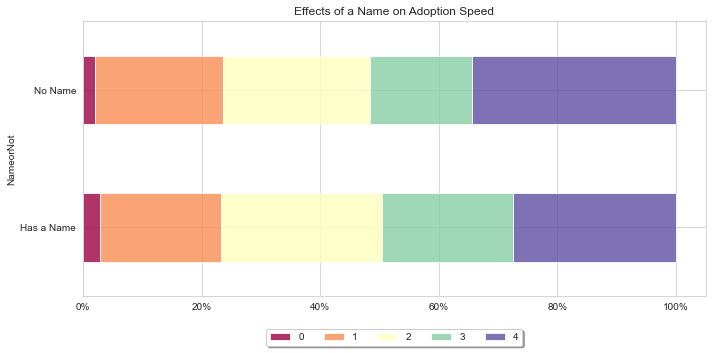

In [9]:
train['NameorNot'] = np.where(train['Name'].isnull(), 'No Name', 'Has a Name')
test['NameorNot'] = np.where(test['Name'].isnull(), 'No Name', 'Has a Name')


name_or_not = train.groupby(['NameorNot', 'AdoptionSpeed']).size().reset_index().pivot(
    columns='AdoptionSpeed', index='NameorNot', values=0)
print("Number of Animals by Type")
display(name_or_not)

ggDF = train['NameorNot'].value_counts()
count_overview(ggDF, 'NameorNot Count')

tab = pd.crosstab(train['NameorNot'], train['AdoptionSpeed'])
table = sm.stats.Table(tab)

print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Effects of a Name on Adoption Speed")
plt.show()

Looking at the standardized residuals table and the bottom plot, we can see that pets that are listed without a name are more likely to NOT be adopted (Adoption Speed = 4).

* As a rule of thumb, values outside the range of [-2, 2] exhibit a lower or higher than expected frequency, respectively.

### Age (In Years)

Absolute Counts -  AdoptionSpeed vs Age in Years  
  



Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21
AdoptionSpeed,,,,,,,,,,,,,,,,,,,
0,297,57,24,9,5,6,6,1,3,1,1,0,0,0,0,0,0,0,0
1,2494,223,132,87,62,49,9,15,8,4,5,1,1,0,0,0,0,0,0
2,3275,314,133,93,69,57,39,31,11,4,8,1,1,1,0,0,0,0,0
3,2516,289,176,83,50,53,31,33,11,4,4,4,1,0,1,1,2,0,0
4,2662,674,352,212,114,58,40,32,15,11,17,3,2,0,0,1,1,1,2


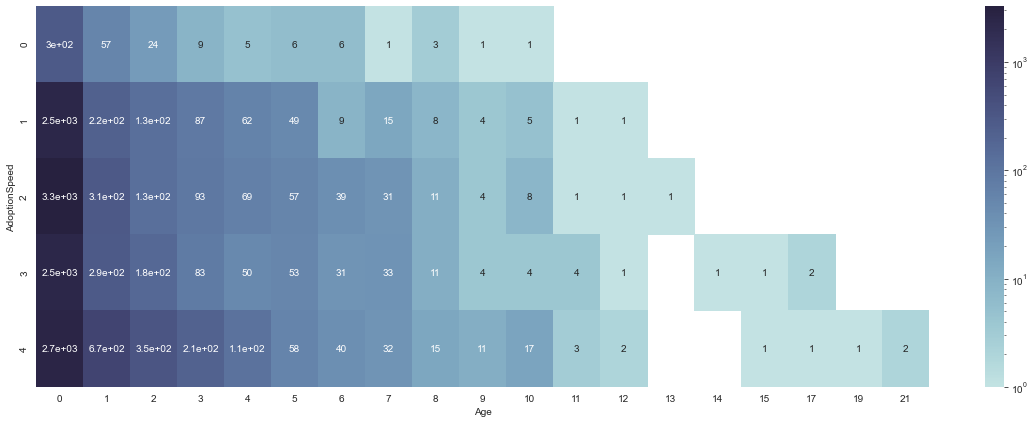

In [36]:
age_yrs = pd.DataFrame([train['Age']//12, train['AdoptionSpeed']]).transpose()
age_yrs['Value'] = 1
age_yrs = age_yrs.groupby(['Age','AdoptionSpeed']).sum()

age_yrs_pivot = pd.pivot_table(age_yrs, values='Value', index='AdoptionSpeed', columns='Age').fillna(0).astype('int64')
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

print('Absolute Counts -  AdoptionSpeed vs Age in Years  \n  \n')
plt.figure(figsize=(20,7))
display(age_yrs_pivot)
sns.heatmap(age_yrs_pivot, norm=LogNorm(), cmap=cmap, annot=True)
plt.show()

Relative Percent -  AdoptionSpeed vs Age in Years  
  



Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21
AdoptionSpeed,,,,,,,,,,,,,,,,,,,
0,2,3,2,1,1,2,4,0,6,4,2,0,0,0,0,0,0,0,0
1,22,14,16,17,20,21,7,13,16,16,14,11,20,0,0,0,0,0,0
2,29,20,16,19,23,25,31,27,22,16,22,11,20,100,0,0,0,0,0
3,22,18,21,17,16,23,24,29,22,16,11,44,20,0,100,50,66,0,0
4,23,43,43,43,38,26,32,28,31,45,48,33,40,0,0,50,33,100,100


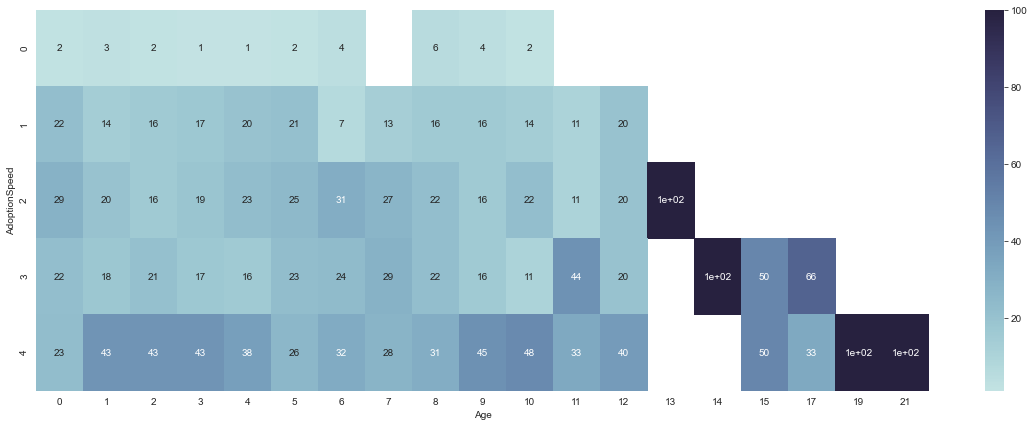

In [37]:
print('Relative Percent -  AdoptionSpeed vs Age in Years  \n  \n')

age_pivot_pct = (age_yrs_pivot.div(age_yrs_pivot.sum(axis=0), axis=1)*100).astype('int64')


display(age_pivot_pct)
plt.figure(figsize=(20,7))
sns.heatmap(age_pivot_pct.replace(['0', 0], np.nan), cmap=cmap, annot=True)
plt.show()

In [28]:
data_df = train.copy(deep=True)
data_df['Sterilized'].replace({1:"Neutered", 2:"Not Neutered", 3:"Unsure"}, inplace=True)
data_df['Gender'].replace({1:"Male", 2:"Female", 3:"Mixed"}, inplace=True)
data_df['Type'].replace({1: "Dog", 2: "Cat"}, inplace=True)
data_df['sterile_gender_type'] = data_df['Sterilized'] + " || " + data_df['Gender'].astype('str') + "||" + data_df['Type'].astype('str')
data_df['sterile_gender_type']

0          Not Neutered || Male||Cat
1                Unsure || Male||Cat
2          Not Neutered || Male||Dog
3        Not Neutered || Female||Dog
4          Not Neutered || Male||Dog
                    ...             
14988     Not Neutered || Mixed||Cat
14989         Neutered || Mixed||Cat
14990           Unsure || Mixed||Cat
14991        Neutered || Female||Cat
14992      Not Neutered || Male||Dog
Name: sterile_gender_type, Length: 14993, dtype: object

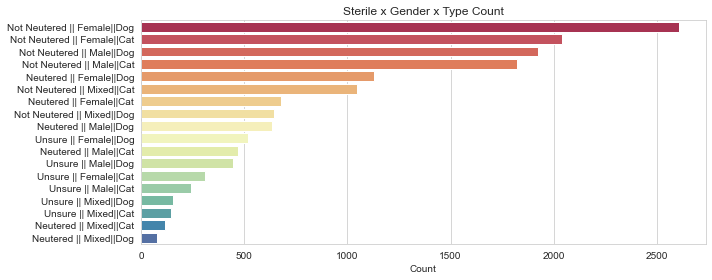

Chi-Square Test of Independence: p-value = 2.699E-188


AdoptionSpeed,0,1,2,3,4
sterile_gender_type,,,,,
Neutered || Female||Cat,0.365389,-4.117960,-2.663639,-1.139470,7.255865
Neutered || Female||Dog,-2.067852,-9.934107,-6.853274,3.628375,13.139097
Neutered || Male||Cat,-0.222142,-4.096519,-1.774614,0.055748,5.473597
Neutered || Male||Dog,-0.842806,-4.716016,-2.123812,1.744217,5.051044
Neutered || Mixed||Cat,-0.083113,-2.939302,-2.102927,-2.722896,7.257541
Neutered || Mixed||Dog,-0.774575,-2.222776,-0.188788,0.903790,1.640236
Not Neutered || Female||Cat,3.838261,6.243269,3.236794,-2.253041,-8.147336
Not Neutered || Female||Dog,-2.149178,-3.307907,3.950544,6.977575,-6.552271
Not Neutered || Male||Cat,1.104169,9.314391,4.209178,-3.990184,-9.285953


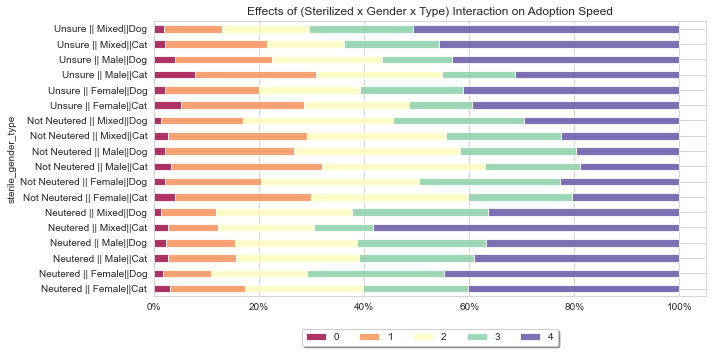

In [30]:
ggDF = data_df['sterile_gender_type'].value_counts()
count_overview(ggDF, 'Sterile x Gender x Type Count')

tab = pd.crosstab(data_df['sterile_gender_type'], data_df['AdoptionSpeed'])
table = sm.stats.Table(tab)

print("Chi-Square Test of Independence: p-value = {:.3E}".format(sp.stats.chi2_contingency(tab)[1]))
display(table.standardized_resids)

stacked_barplot(tab, "Effects of (Sterilized x Gender x Type) Interaction on Adoption Speed")
plt.show()